# **Répartition du travail de groupe**

Façon de travailler ensemble : Nous avons commencé par regarder ensemble l’exemple du covid-19 fourni dans les documents du TD5 de Langage Python. Après cela, nous nous sommes lancées ensemble dans l’exploitation des data frame fournies (tables). Après avoir vu quelques graphiques ensemble, nous avons décidé des graphiques qui nous ont paru pertinents puis nous nous sommes réparti le travail. Dès que l’une de nous était bloquée dans la construction de son graphique, les deux autres n’hésitaient pas à l’aider. Nous avons aussi réutilisé le travail préliminaire effectué pour certains graphiques pour des nouveaux graphiques. 

Pendant toute la durée de notre travail, nous étions toutes assises dans la même pièce pour pouvoir échanger facilement.
Contribution de chacune : 

Laure-Anne : 8 visualisations

Chloé : 6 visualisations

Flora : 7 visualisations

Laure-Anne + Chloé : 1 visualisation

Laure_Anne + Flora : 1 visualisation

Chloé + Flora : 2 visualisations

A trois : 1 visualisation

Mise en page du googlecolab : Laure-Anne

Interprétations des graphiques : Chloé et Flora

Répartition du travail : Étant donné que nous nous sommes beaucoup entraidé et que nous avons souvent utilisé le travail préliminaire effectué par l’une d’entre nous pour certains types de tables ou de graphiques, nous estimons que nous avons chacune effectué un tiers du travail total.


# **Installation**

In [ ]:
!pip install calmap
!pip install plotly==4.5.2
!pip install squarify

In [ ]:
# essential libraries
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import calmap
import folium
import squarify 

In [ ]:
# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# **Importation du dataset et affichage pour 2019**

In [ ]:
# importing datasets
full_table = pd.read_csv('https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20200416-115822/valeursfoncieres-2019.txt', sep = '|')
full_table

# dataframe info
# full_table.info()

# checking for missing value
# full_table.isna().sum()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,"37220,00",26.0,NaN,RUE,2730,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,1,53,NaN,AI,298,NaN,8,"19,27",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,20.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,"185100,00",22.0,NaN,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AM,95,NaN,137,NaN,154,"61,51",NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,62.0,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,"185100,00",22.0,B,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AM,95,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2019,Vente,"209000,00",3.0,NaN,RUE,0043,DES CHAMPAGNES,1160.0,PRIAY,1,314,NaN,E,1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,90.0,4.0,S,NaN,940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2019,Vente,"134900,00",5.0,NaN,LOT,A003,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,1,350,NaN,AA,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,101.0,5.0,S,NaN,490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/12/2019,Vente,"17521000,00",32.0,NaN,QUAI,0940,DE BETHUNE,75004.0,PARIS 04,75,104,NaN,AU,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,120.0,5.0,S,NaN,470.0
2535787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/12/2019,Vente,"17521000,00",32.0,NaN,QUAI,0940,DE BETHUNE,75004.0,PARIS 04,75,104,NaN,AU,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,470.0
2535788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/10/2019,Adjudication,"610000,00",12.0,NaN,RUE,0797,BEAUTREILLIS,75004.0,PARIS 04,75,104,NaN,AQ,40,NaN,2,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,44.0,2.0,NaN,NaN,NaN
2535789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/12/2019,Vente,"1400000,00",24.0,NaN,RUE,8752,SAINT SAUVEUR,75002.0,PARIS 02,75,102,NaN,AM,18,NaN,3,"101,40",4,"43,70",8,NaN,NaN,NaN,NaN,NaN,3,4.0,Local industriel. commercial ou assimilé,NaN,100.0,0.0,NaN,NaN,NaN


# **Cleaning Data pour 2019** 

## Suppression des colonnes inutiles

In [ ]:
del full_table['Code service CH']
del full_table['Reference document']
del full_table['1 Articles CGI']
del full_table['2 Articles CGI']
del full_table['3 Articles CGI']
del full_table['4 Articles CGI']
del full_table['5 Articles CGI']
del full_table['B/T/Q']
del full_table['No plan']
del full_table['No Volume']
del full_table['Surface Carrez du 1er lot']
del full_table['1er lot']
del full_table['2eme lot']
del full_table['Surface Carrez du 2eme lot']
del full_table['3eme lot']
del full_table['Surface Carrez du 3eme lot']
del full_table['4eme lot']
del full_table['Surface Carrez du 4eme lot']
del full_table['5eme lot']
del full_table['Surface Carrez du 5eme lot']
del full_table['Code type local']
del full_table['Identifiant local']
del full_table['Nature culture']
del full_table['Nature culture speciale']

KeyError: ignored

## Affichage du type de chaque attribut

In [ ]:
print(full_table.dtypes)

No disposition                 int64
Date mutation                 object
Nature mutation               object
Valeur fonciere               object
No voie                      float64
Type de voie                  object
Code voie                     object
Voie                          object
Code postal                  float64
Commune                       object
Code departement              object
Code commune                   int64
Prefixe de section           float64
Section                       object
Nombre de lots                 int64
Type local                    object
Surface reelle bati          float64
Nombre pieces principales    float64
Surface terrain              float64
dtype: object


## Table 2019 modifiée avec "Surface reelle bati" sans les 0 et les NaN

In [ ]:

print("Description de la full table :")
print(full_table["Surface reelle bati"].describe())
full_table_modif=full_table.copy() 

print("Table Surface relle bati de base :")
print(full_table_modif["Surface reelle bati"])

print("Nb de valeurs manquantes dans full table ( valeurs NaN): ")
print(full_table_modif["Surface reelle bati"].isnull().sum())

print("Liste des index où la valeur est 0 : ")
drop_0_init=full_table_modif.index[full_table_modif["Surface reelle bati"] == 0.0].tolist()
print(drop_0_init)

print("------------------------Modification de la table ------------------------")

print("Remplacement de 0 par NaN :")
full_table_modif["Surface reelle bati"]=full_table_modif["Surface reelle bati"].replace({ 0:np.nan})

print("Nouvelles missing values :")
print(full_table_modif["Surface reelle bati"].isnull().sum())

print("Suppression des valeurs NaN")
full_table_modif.dropna(axis=0, how='all', subset=['Surface reelle bati'], inplace=True)

print("Nouveau nombre de valeurs manquantes : ")
print(full_table_modif["Surface reelle bati"].isnull().sum())

print("------------------------Nouvelle table modifiée ------------------------")
print(full_table_modif)

print("Nouvelle table surface bati modifiée : ")
print(full_table_modif["Surface reelle bati"])
print("Description de la full table modifiée : ")
print(full_table_modif["Surface reelle bati"].describe())

print("Index où les valeur sont égales à 0.0 : ")
drop_0=full_table_modif.index[full_table_modif["Surface reelle bati"] == 0.0].tolist()
print(drop_0)


Description de la full table :
count    1.351615e+06
mean     8.775654e+01
std      8.728312e+02
min      0.000000e+00
25%      1.500000e+01
50%      6.000000e+01
75%      9.400000e+01
max      3.129620e+05
Name: Surface reelle bati, dtype: float64
Table Surface relle bati de base :
0           20.0
1           62.0
2            0.0
3           90.0
4          101.0
           ...  
2535786    120.0
2535787      0.0
2535788     44.0
2535789    100.0
2535790     97.0
Name: Surface reelle bati, Length: 2535791, dtype: float64
Nb de valeurs manquantes dans full table ( valeurs NaN): 
1184176
Liste des index où la valeur est 0 : 
[2, 8, 17, 19, 32, 37, 39, 41, 43, 44, 45, 46, 47, 51, 52, 53, 54, 55, 63, 66, 70, 75, 78, 83, 84, 86, 88, 91, 92, 131, 132, 133, 134, 135, 229, 231, 290, 293, 297, 309, 339, 340, 350, 351, 371, 372, 378, 384, 398, 407, 430, 431, 445, 531, 548, 549, 552, 553, 566, 573, 592, 614, 616, 630, 633, 646, 670, 671, 673, 674, 678, 692, 694, 717, 721, 742, 743, 744, 745, 7

## Correction Colonne des communes

In [ ]:
full_table_modif['Commune'] =  full_table_modif['Commune'].str.replace('-',' ')
full_table['Commune'] = full_table['Commune'].str.replace('-',' ')



## Conversion de la colonne "Valeur foncière" de object à float

In [ ]:
full_table_modif['Valeur fonciere'] =  full_table_modif['Valeur fonciere'].str.replace(',','.')
full_table_modif['Valeur fonciere'] = full_table_modif['Valeur fonciere'].astype(str).astype(float)
print(full_table['Valeur fonciere'])


0             37220,00
1            185100,00
2            185100,00
3            209000,00
4            134900,00
              ...     
2535786    17521000,00
2535787    17521000,00
2535788      610000,00
2535789     1400000,00
2535790     1400000,00
Name: Valeur fonciere, Length: 2535791, dtype: object


## Affichage type full table modifié

In [ ]:
print(full_table_modif.dtypes)

No disposition                 int64
Date mutation                 object
Nature mutation               object
Valeur fonciere              float64
No voie                      float64
Type de voie                  object
Code voie                     object
Voie                          object
Code postal                  float64
Commune                       object
Code departement              object
Code commune                   int64
Prefixe de section           float64
Section                       object
Nombre de lots                 int64
Type local                    object
Surface reelle bati          float64
Nombre pieces principales    float64
Surface terrain              float64
dtype: object


## Calcul du prix du mètre carré dans la table modifiée

In [ ]:
#full_table_modif['Prix_metre2_terrain'] = full_table_modif['Valeur fonciere'] / full_table_modif['Surface terrain']
#print(full_table_modif['Prix_metre2_terrain'])
full_table_modif['Prix_metre2_Bati'] = full_table_modif['Valeur fonciere'] / (full_table_modif['Surface reelle bati']+full_table_modif["Surface terrain"])
print(full_table_modif['Prix_metre2_Bati'])
print(full_table_modif["Prix_metre2_Bati"].describe())
print("Moyenne du prix du m2 bati :")
print(full_table_modif['Prix_metre2_Bati'].mean())

0                   NaN
1                   NaN
3            202.912621
4            228.257191
5            241.206030
               ...     
2535785    32688.432836
2535786    29696.610169
2535788             NaN
2535789             NaN
2535790             NaN
Name: Prix_metre2_Bati, Length: 1035415, dtype: float64
count    6.481060e+05
mean     1.724873e+03
std      1.355957e+04
min      7.285125e-06
25%      1.664145e+02
50%      3.357662e+02
75%      6.981941e+02
max      3.300633e+06
Name: Prix_metre2_Bati, dtype: float64
Moyenne du prix du m2 bati :
1724.8731846363194


# **Graphiques pour 2019**


## Graphiques autour du prix en m2

### Barplot du prix moyen du metre2 par commune en 2019

In [ ]:
table_m2_com=full_table_modif.copy()
table_m2_com=table_m2_com[["Commune","Prix_metre2_Bati"]]
table_m2_com=table_m2_com.groupby(["Commune"]).mean().reset_index()
table_m2_com

fig = px.bar(table_m2_com.sort_values('Prix_metre2_Bati', ascending = False).head(10).sort_values('Prix_metre2_Bati', ascending = True), x = "Prix_metre2_Bati", y= "Commune", title = 'Prix moyen du m2 par commune en 2019', text='Prix_metre2_Bati', orientation = 'h', width=700, height=700, range_x = [0, max(table_m2_com['Prix_metre2_Bati'])+5000])
fig.update_traces(marker_color = '#21bf73', opacity = 0.6, textposition = 'outside')



On voit bien que Plougourvest est la commune en tête bien que ce soit une très petite commune. Nous étions étonnées par ce résultat mais nous avons trouvé dans le fichier valeursfoncieres-2019 des terrains pas si grands de plus de 1 milliard d’euros dans cette commune.

### Courbe du prix moyen du metre2 à Paris en fonction du temps (sur l'année 2019)

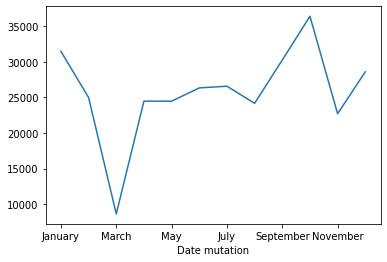

In [ ]:
#Convertir le type des dates de object à dateTime
full_table_modif['Date mutation'] = pd.to_datetime(full_table_modif['Date mutation'])
#Trier le tableau par date
full_table_modif = full_table_modif.sort_values(by="Date mutation")
#Prix du mètre carré à paris en fonction du temps
#Selection des lignes avec Paris comme commune
table_paris=full_table_modif
#table_paris=table_paris
table_paris=table_paris[table_paris["Code departement"]==75][["Prix_metre2_Bati","Date mutation","Commune","Code departement"]]
#table_paris=table_paris.loc[:,["Commune","Prix_metre2_Bati","Date mutation"]]
#print("Table avec toutes les communes=Paris : ")
#print(table_paris)
#Regrouper la table par journée 
table_paris_m2_month = table_paris['Prix_metre2_Bati'].groupby(table_paris['Date mutation'].dt.strftime('%B')).mean()
#Recuperer la moyenne du prix au metre carré par jour à Paris
#print("Table finale :")
#print(table_paris_m2_jour)
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
table_paris_m2_month = table_paris_m2_month.reindex(annee)
table_paris_m2_month.plot()

On remarque clairement une hausse de prix importante à partir du mois d’août jusqu’au mois d’octobre ; cela correspond à la période de rentrée scolaire. En revanche, le prix moyen du m2 à Paris en 2019 était à son plus bas en mars. 

### Barplot valeur fonciere par commune en 2019

In [ ]:
table_valeur_fonciere = full_table_modif.copy()
table_valeur_fonciere = table_valeur_fonciere[["Commune","Valeur fonciere"]]
table_valeur_fonciere = table_valeur_fonciere.groupby(["Commune"]).mean().reset_index()
fig = px.bar(table_valeur_fonciere.sort_values('Valeur fonciere', ascending = False).head(30).sort_values('Valeur fonciere', ascending = True), x = "Valeur fonciere", y= "Commune", title = 'valeur fonciere par commune en 2019', text='Valeur fonciere', orientation = 'h', width=700, height=700, range_x = [0, max(table_valeur_fonciere['Valeur fonciere'])+200000000])
fig.update_traces(marker_color = '#ff2e63', opacity = 0.6, textposition = 'outside')
fig.show()   

Plougourvest est toujours en tête (de façon attendue).


### Courbes du prix moyen du mètre2 par jour et par mois sur l'année 2019

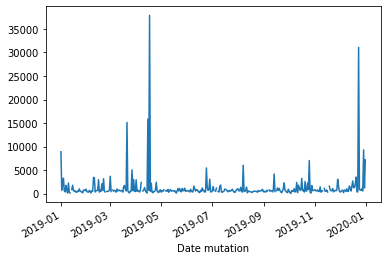

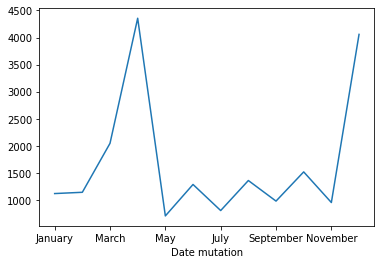

In [ ]:
#Regrouper les mètres carré de chaque transaction par jour
table_m2_jours = full_table_modif.copy()
table_m2_jours=table_m2_jours["Prix_metre2_Bati"].groupby(table_m2_jours['Date mutation'])
#Afficher les moyennes du prix du mètre carré par jour
table_m2_jours=table_m2_jours.mean()
table_m2_jours.plot()
plt.show()


#Trié par mois :
table_m2_month = full_table_modif.copy()
table_m2_month=table_m2_month.groupby(table_m2_month['Date mutation'].dt.strftime('%B'))['Prix_metre2_Bati'].mean()
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
table_m2_month = table_m2_month.reindex(annee)
table_m2_month.plot()
#print(table_m2_month)

On remarque très clairement un pic au mois d’avril. Sachant que le nombre de ventes en 2019 connait une chute en Mars (prochains graphiques), on peut penser que c'est justement à cause de cette hausse du prix moyen du mètre carré à cette période.

### Comparaison du prix moyen du m2 en France et à Paris

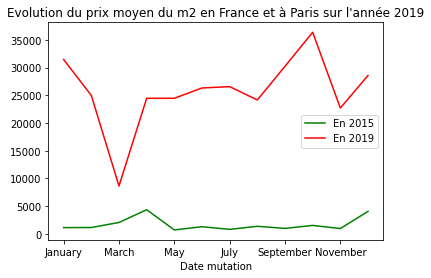

In [ ]:
table_m2_month = pd.DataFrame(table_m2_month)
table_paris_m2_month = pd.DataFrame(table_paris_m2_month)
df_tps = pd.merge(left=table_m2_month, right=table_paris_m2_month, left_on='Date mutation', right_on='Date mutation')
#print(df_tps)
df_tps['Prix_metre2_Bati_x'].plot(color='g')
df_tps['Prix_metre2_Bati_y'].plot(color='r')
plt.title("Evolution du prix moyen du m2 en France et à Paris sur l'année 2019")
plt.legend(['En 2015', 'En 2019'], loc='upper middle')

Les deux courbes n’ont pas du tout leur pic maximal au même endroit. Cela implique que l’évolution du prix du m2 ne se fait pas à l’échelle nationale.

## Graphique autour du nombre de ventes

### Tree map du nombre de ventes par département en 2019

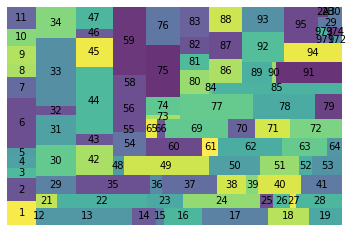

In [ ]:
Vente_Depart = full_table[full_table['Nature mutation']=='Vente'][['Nature mutation', 'Code departement']]  #[2308539 rows x 2 columns]
Vente_Depart['Nombre_Vente']=1  #on rajoute une colonne avec uniquement des 1 dedans

Vente_Depart_grouped = Vente_Depart.groupby(['Code departement']).sum().reset_index()

nb = Vente_Depart_grouped['Nombre_Vente'].values.tolist()
cd_depart = Vente_Depart_grouped['Code departement'].values.tolist()

vd = pd.DataFrame({'Nombre_Vente':nb, 'Code departement':cd_depart})
squarify.plot(sizes=vd['Nombre_Vente'], label=vd['Code departement'], alpha=.8 )
plt.axis('off')
plt.show()

On ne remarque pas de département où il y aurait beaucoup de ventes que dans les autres départements. Cependant, trois départements se démarquent plus des autres : le 33 (Gironde), 44 (Loire-Atlantique) et 75 (Paris).

### Treemap du nombre de ventes par commune pour le departement Haut de seine en 2019

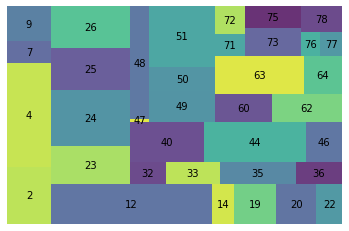

Tableau associant une commune à son code commune et son nombre de vente:


,Code commune,Commune,Nombre_Vente
0,2,ANTONY,1386
1,4,ASNIERES SUR SEINE,2524
2,7,BAGNEUX,523
3,9,BOIS COLOMBES,846
4,12,BOULOGNE BILLANCOURT,3562
5,14,BOURG LA REINE,490
6,19,CHATENAY MALABRY,918
7,20,CHATILLON,890
8,22,CHAVILLE,566
9,23,CLAMART,1668


In [ ]:
Nb_Vente_commune1 = full_table[full_table['Nature mutation']=='Vente'][['Nature mutation', 'Code departement','Code commune', 'Commune']]  
Nb_Vente_commune1 = Nb_Vente_commune1[Nb_Vente_commune1['Code departement'] == 92][['Nature mutation', 'Code commune', 'Commune']]
Nb_Vente_commune1['Nombre_Vente']=1  #on rajoute une colonne avec uniquement des 1 dedans
Nb_Vente_commune1_grouped = Nb_Vente_commune1.groupby(['Code commune','Commune']).sum().reset_index()


nb = Nb_Vente_commune1_grouped['Nombre_Vente'].values.tolist()
cd_depart = Nb_Vente_commune1_grouped['Code commune'].values.tolist()

vd = pd.DataFrame({'Nombre_Vente':nb, 'Commune':cd_depart})
squarify.plot(sizes=vd['Nombre_Vente'], label=vd['Commune'], alpha=.8 )
plt.axis('off')
plt.show()

print("Tableau associant une commune à son code commune et son nombre de vente:")
Nb_Vente_commune1_grouped.sort_values('Nombre_Vente', ascending=False)
Nb_Vente_commune1_grouped.style.background_gradient(cmap='Oranges')

En Haut de Seine, les communes  24 (Clichy) et 51 (Neuilly-sur-Seine) sont celles qui ont eu le plus de ventes en 2019.

### Treemap du nombre de ventes par commune pour le departement Paris en 2019

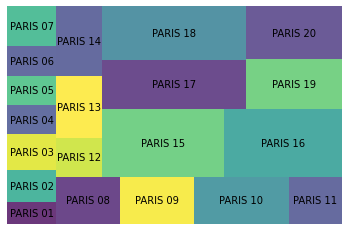

Tableau associant un arrondissement à son nombre de vente:


,Commune,Nombre_Vente
0,PARIS 01,835
1,PARIS 02,1201
2,PARIS 03,1355
3,PARIS 04,1087
4,PARIS 05,1121
5,PARIS 06,1107
6,PARIS 07,1511
7,PARIS 08,2325
8,PARIS 09,2642
9,PARIS 10,3422


In [ ]:
Nb_Vente_commune2 = full_table[full_table['Nature mutation']=='Vente'][['Nature mutation', 'Code departement','Commune']]  

Nb_Vente_commune2 = Nb_Vente_commune2[Nb_Vente_commune2['Code departement'] == 75][['Nature mutation', 'Commune']]
Nb_Vente_commune2['Nombre_Vente']=1  #on rajoute une colonne avec uniquement des 1 dedans
Nb_Vente_commune2_grouped = Nb_Vente_commune2.groupby(['Commune']).sum().reset_index()

nb = Nb_Vente_commune2_grouped['Nombre_Vente'].values.tolist()
cd_depart = Nb_Vente_commune2_grouped['Commune'].values.tolist()

vd = pd.DataFrame({'Nombre_Vente':nb, 'Commune':cd_depart})
squarify.plot(sizes=vd['Nombre_Vente'], label=vd['Commune'], alpha=.8 )
plt.axis('off')
plt.show()

print("Tableau associant un arrondissement à son nombre de vente:")
Nb_Vente_commune2_grouped.sort_values('Nombre_Vente', ascending=False)
Nb_Vente_commune2_grouped

Dans Paris, les deux arrondissements ayant cunnu le plus de ventes sont le 15e et le 16e (qui font partie des arrondissements les plus chers de Paris).

### Treemap du nombre de ventes par commune pour le departement Bouches-du-Rhones en 2019

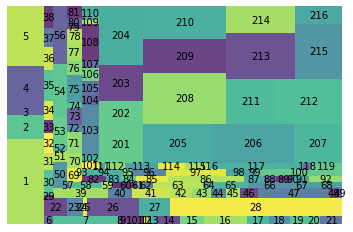

Tableau associant une commune à son code commune :


,Code commune,Commune,Nombre_Vente
0,1,AIX EN PROVENCE,2081
1,2,ALLAUCH,595
2,3,ALLEINS,119
3,4,ARLES,1073
4,5,AUBAGNE,1477
5,6,AUREILLE,48
6,7,AURIOL,349
7,8,AURONS,17
8,9,LA BARBEN,13
9,10,BARBENTANE,94


In [ ]:
Nb_Vente_commune4 = full_table[full_table['Nature mutation']=='Vente'][['Nature mutation', 'Code departement','Code commune', 'Commune']]
Nb_Vente_commune4 = Nb_Vente_commune4[Nb_Vente_commune4['Code departement'] == 13][['Nature mutation', 'Code commune', 'Commune']]
Nb_Vente_commune4['Nombre_Vente']=1  #on rajoute une colonne avec uniquement des 1 dedans
#print(Nb_Vente_commune1)
Nb_Vente_commune4_grouped = Nb_Vente_commune4.groupby(['Code commune', 'Commune']).sum().reset_index()
#print(Nb_Vente_commune1_grouped)

nb = Nb_Vente_commune4_grouped['Nombre_Vente'].values.tolist()
cd_depart = Nb_Vente_commune4_grouped['Code commune'].values.tolist()

vd = pd.DataFrame({'Nombre_Vente':nb, 'Code commune':cd_depart})
squarify.plot(sizes=vd['Nombre_Vente'], label=vd['Code commune'], alpha=.8 )
plt.axis('off')
plt.show()


print("Tableau associant une commune à son code commune :")
Nb_Vente_commune4_grouped.sort_values('Nombre_Vente', ascending=False)
Nb_Vente_commune4_grouped.style.background_gradient(cmap='Purples')




Dans les Bouches-du-Rhône, les communes 206 et 208 (Marseilles arrondissements 6 et 8 respectivement) se démarquent par des rectangles de superficies légèrement plus grandes.

### Nb vente par commune (en france)

In [ ]:
Vente_commune = full_table[full_table['Nature mutation']=='Vente'][['Nature mutation', 'Commune']] 
Vente_commune['Nombre_Vente']=1  #on rajoute une colonne avec uniquement des 1 dedans

Vente_commune_grouped = Vente_commune.groupby(['Commune']).sum().reset_index()
#print(Vente_commune_grouped)


fig = px.bar(Vente_commune_grouped.sort_values('Nombre_Vente', ascending = False).head(12).sort_values('Nombre_Vente', ascending = True), x = "Nombre_Vente", y = "Commune", title = 'Nombre de ventes par commune en france en 2019', text= 'Nombre_Vente', orientation = 'h', width = 700, height= 700)
fig.update_traces(marker_color = 'lightskyblue', opacity = 0.6, textposition = 'outside')
fig.show() 


Les trois communes en tête sont Nice, Toulouse et Nantes. On remarque très clairement que ce sont les communes les plus grandes qui attirent le plus de monde.

### Courbe du nombre de ventes en fonction du temps sur l'année 2019

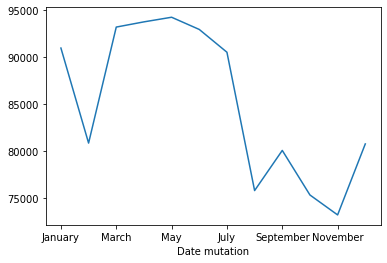

In [ ]:
#Tableau vente en fonction du temps
table_vente_jours=full_table_modif.copy()
table_vente_jours = table_vente_jours[table_vente_jours['Nature mutation']=='Vente'][["Date mutation"]]
table_vente_jours["Nombre de vente"]=1

table_vente_jours=table_vente_jours.groupby(table_vente_jours["Date mutation"].dt.strftime('%B'))['Nombre de vente']
print(table_vente_jours)
table_vente_jours=table_vente_jours.sum()
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
table_vente_jours=table_vente_jours.reindex(annee)
table_vente_jours.plot()
plt.show()



La majorité des ventes de biens immobiliers en 2019 s’est effectuée entre les mois de mars et de juillet.


## Graphique autour des surfaces des biens

### Barplot de la surface moyenne des biens par commune en 2019

In [ ]:
table_surface = full_table.copy()
table_surface = table_surface[["Commune","Surface reelle bati","Surface terrain"]]
table_surface['Surface moyenne']= table_surface['Surface reelle bati'] + table_surface['Surface terrain']

del table_surface['Surface reelle bati']
del table_surface['Surface terrain']
table_surface = table_surface.groupby(["Commune"]).mean().reset_index()

fig = px.bar(table_surface.sort_values('Surface moyenne', ascending = False).head(15).sort_values('Surface moyenne', ascending = True), x = "Surface moyenne", y= "Commune", title = 'Surface moyenne des biens par commune en 2019', text='Surface moyenne', orientation = 'h', width=700, height=700)
fig.update_traces(marker_color = '#fe9801', opacity = 0.6, textposition = 'outside')
fig.show()      



Une commune se démarque : Gonfreville l’orcher, avec une surface de plus de 300 000 m2. On remarque ici que le top10 des communes avec la plus grande surface moyenne de biens en 2019 ne sont pas les plus grandes métropoles française, ce qui peut s’expliquer par une grande surface de terrain que l’on trouve plutôt en campagne.

### Barplot des surfaces maximales des biens par commune en 2019

In [ ]:
table_surface_max = full_table.copy()
table_surface_max = table_surface_max[["Commune","Surface reelle bati","Surface terrain"]]
table_surface_max['Surface max']= table_surface_max['Surface reelle bati'] + table_surface_max['Surface terrain']

del table_surface_max['Surface reelle bati']
del table_surface_max['Surface terrain']
table_surface_max = table_surface_max.groupby(["Commune"]).max().reset_index()

fig = px.bar(table_surface_max.sort_values('Surface max', ascending = False).head(15).sort_values('Surface max', ascending = True), x = "Surface max", y= "Commune", title = 'Surface maximale des biens par commune en 2019', text='Surface max', orientation = 'h', width=700, height=700)
fig.update_traces(marker_color = 'lightgreen', opacity = 0.6, textposition = 'outside')
fig.show()      


Comme pour le graphique précédent, les communes de campagne l’emportent.

### Diagramme en bâton de la surface moyenne des biens par département

In [ ]:
table_surface_moy_dep = full_table.copy()
table_surface_moy_dep = table_surface_moy_dep[["Code departement","Surface reelle bati","Surface terrain"]]
table_surface_moy_dep['Surface moyenne']= table_surface_moy_dep['Surface reelle bati'] + table_surface_moy_dep['Surface terrain']

del table_surface_moy_dep['Surface reelle bati']
del table_surface_moy_dep['Surface terrain']
table_surface_moy_dep = table_surface_moy_dep.groupby(["Code departement"]).mean().reset_index()

fig = px.bar(table_surface_moy_dep.sort_values('Surface moyenne', ascending = False).head(15), x = "Code departement", y= "Surface moyenne", title = 'Surface moyenne des biens par département en 2019', text='Surface moyenne', width=700, height=700, range_x = [0, 100],range_y = [0, 15000])
fig.update_traces(marker_color = '#fe9801', opacity = 0.6, textposition = 'outside')
fig.show() 

Le département ayant la surface moyenne de biens la plus élevée est le 95, mais Gonfreville L’Orcher (76) trouvé précédemment n’appartient pas à ce département, mais au 4ème plus grand pic.

### Diagramme en bâton de la surface maximale des biens par département

In [ ]:
table_surface_max_dep = full_table.copy()
table_surface_max_dep = table_surface_max_dep[["Code departement","Surface reelle bati","Surface terrain"]]
table_surface_max_dep['Surface max']= table_surface_max_dep['Surface reelle bati'] + table_surface_max_dep['Surface terrain']

del table_surface_max_dep['Surface reelle bati']
del table_surface_max_dep['Surface terrain']
table_surface_max_dep = table_surface_max_dep.groupby(["Code departement"]).max().reset_index()


fig = px.bar(table_surface_max_dep.sort_values('Surface max', ascending = False).head(15), x = "Code departement", y= "Surface max", title = 'Surface maximale des biens par département en 2019', text='Surface max', width=700, height=700, range_x = [0, 100],range_y = [0, 1500000])
fig.update_traces(marker_color = 'lightgreen', opacity = 0.6, textposition = 'outside')
fig.show()      

Au niveau de la surface maximale de biens, le 74 est en tête , ce qui correspond bien au département de Chamonix.

## Graphiques autour des différents types de locaux

### Treemap de la répartition des différents types de locaux vendus ou échangés au cours de l'année 2019

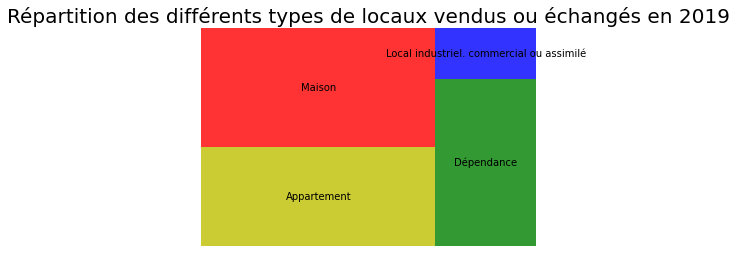

In [ ]:
Appart=full_table[full_table['Type local']=='Appartement']['Type local'] #430975
Maison=full_table[full_table['Type local']=='Maison']['Type local'] #⌂515398
Dependance=full_table[full_table['Type local']=='Dépendance']['Type local'] #312480
Local_ica=full_table[full_table['Type local']=='Local industriel. commercial ou assimilé']['Type local'] #94479
df = pd.DataFrame({'nb':[430975, 515398, 312480, 94479], 'type_local':["Appartement", "Maison", "Dépendance", "Local industriel. commercial ou assimilé"] })
squarify.plot(sizes=df['nb'], label=df['type_local'], color=['y','r','g','b'], alpha=.8)
plt.axis('off')
plt.title("Répartition des différents types de locaux vendus ou échangés en 2019",fontsize=20)
plt.show()

On remarque que les maison, appartement et dépendances sont les locaux les plus vendus ou échangé en 2019, tandis que les locaux industriels, commerciaux ou assimilés sont minoritaires.

### Courbes d'evolution du nombre de ventes d'appartement et de maison sur l'année 2019




Text(0.5, 1.0, "Evolution du nombre de ventes d'appartement (bleu) et de maison (vert) sur l'année 2019")

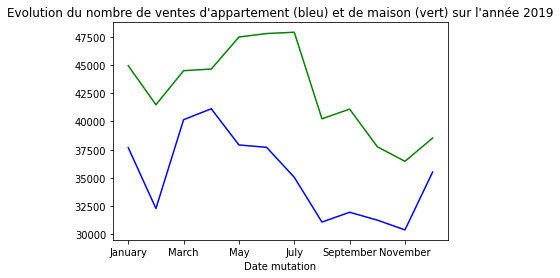

In [ ]:
vente_tps = full_table_modif.copy()
vente_tps = vente_tps[vente_tps['Nature mutation']=='Vente'][['Date mutation','Type local']]
vente_tps['Nombre de vente']=1

venteAppart_tps = vente_tps[vente_tps['Type local']=='Appartement'][['Date mutation','Nombre de vente']]
venteMaison_tps = vente_tps[vente_tps['Type local']=='Maison'][['Date mutation','Nombre de vente']]
#Tableau vente d'appartements en fonction du temps
venteAppart_tps = venteAppart_tps.groupby(venteAppart_tps["Date mutation"].dt.strftime('%B'))['Nombre de vente']
venteAppart_tps = venteAppart_tps.sum()
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
venteAppart_tps = venteAppart_tps.reindex(annee)
#print(venteAppart_tps)
#Tableau vente de maisons en fonction du temps
venteMaison_tps = venteMaison_tps.groupby(venteMaison_tps["Date mutation"].dt.strftime('%B'))['Nombre de vente']
venteMaison_tps = venteMaison_tps.sum()
venteMaison_tps = venteMaison_tps.reindex(annee)
#print(venteMaison_tps)

venteAppart_tps = pd.DataFrame(venteAppart_tps)
venteMaison_tps = pd.DataFrame(venteMaison_tps)
df_tps = pd.merge(left=venteAppart_tps, right=venteMaison_tps, left_on='Date mutation', right_on='Date mutation')
df_tps['Nombre de vente_x'].plot(color='b')
df_tps['Nombre de vente_y'].plot(color='g')
plt.title("Evolution du nombre de ventes d'appartement (bleu) et de maison (vert) sur l'année 2019")

Le nombre de ventes d’appartement ou maison suivent une même tendance : une forte hausse des ventes au printemps suivie d’une baisse en été qui s’accentue en automne.
Le minimum de vente  enregistré pour ces deux types de locaux est en Février 2019.


### Piechart de répartition des différents types de mutation (vente, échange ou vente de terrain à bâtir) de l'année 2019

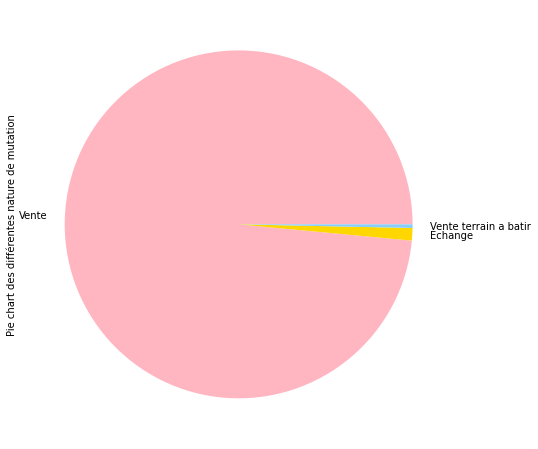

In [ ]:
Vente=full_table[full_table['Nature mutation']=='Vente']['Nature mutation'] #2308539
Echange=full_table[full_table['Nature mutation']=='Echange']['Nature mutation'] #27127
Vente_terrain=full_table[full_table['Nature mutation']=='Vente terrain à bâtir']['Nature mutation'] #7806

Nature_mutation = pd.Series([2308539, 27127, 7806], index=["Vente", "Echange", "Vente terrain a batir"], name="Pie chart des différentes nature de mutation")
Nature_mutation.plot.pie(colors=['lightpink', 'gold','lightskyblue'],figsize=(8, 8))
plt.show()

On comprend bien ici qu’en 2019 les ventes d’appartements, maisons ou résidences sont largement plus importantes que les échange de biens ou que la vente de terrain à bâtir.

## Graphique autour des nombres de pièces des biens en 2019


### Diagramme en bâton du nombre de vente par nombre de pièces

In [ ]:
PiecesAppart = full_table.copy()
PiecesAppart = PiecesAppart[PiecesAppart['Type local']=='Appartement'][['Type local','Nombre pieces principales']]
PiecesAppart['Récurrence']=1

PiecesAppart1 = PiecesAppart[PiecesAppart['Nombre pieces principales']==1] #87956
PiecesAppart2 = PiecesAppart[PiecesAppart['Nombre pieces principales']==2] #127390
PiecesAppart3 = PiecesAppart[PiecesAppart['Nombre pieces principales']==3] #126424
PiecesAppart4 = PiecesAppart[PiecesAppart['Nombre pieces principales']==4] #66593
PiecesAppart5 = PiecesAppart[PiecesAppart['Nombre pieces principales']==5] #17240
PiecesAppart6 = PiecesAppart[PiecesAppart['Nombre pieces principales']==6] #3057
PiecesAppart7 = PiecesAppart[PiecesAppart['Nombre pieces principales']==7] #833
PiecesAppart8 = PiecesAppart[PiecesAppart['Nombre pieces principales']==8] #265
PiecesAppart9 = PiecesAppart[PiecesAppart['Nombre pieces principales']==9] #85
PiecesAppart10 = PiecesAppart[PiecesAppart['Nombre pieces principales']==10] #54
PiecesAppart11 = PiecesAppart[PiecesAppart['Nombre pieces principales']==11] #17
PiecesAppart12 = PiecesAppart[PiecesAppart['Nombre pieces principales']==12] #8
PiecesAppart13 = PiecesAppart[PiecesAppart['Nombre pieces principales']==13] #8
PiecesAppart14 = PiecesAppart[PiecesAppart['Nombre pieces principales']==14] #3
PiecesAppart15 = PiecesAppart[PiecesAppart['Nombre pieces principales']==15] #2
PiecesAppart16 = PiecesAppart[PiecesAppart['Nombre pieces principales']==16] #6
PiecesAppart17 = PiecesAppart[PiecesAppart['Nombre pieces principales']==17] #1

ventePiecesAppart = pd.DataFrame({'Nombre de pieces principales':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],'Nombre vente ou échange':[87956,127390,126424,66593,17240,3057,833,265,85,54,14,8,8,3,2,6,1]})

fig = px.bar(ventePiecesAppart.sort_values('Nombre vente ou échange', ascending=False), x="Nombre de pieces principales", y='Nombre vente ou échange', title='Nombre de mutations appartements en fonction du nombre de pieces', text='Nombre vente ou échange',  width=700, height=700, )
fig.update_traces(marker_color='lightskyblue', opacity=0.6, textposition='outside')
fig.show()

En 2019, les appartements ayant le plus été vendu sont ceux composés de 2-3 pièces principales. Au delà de 6 pièces principales, les bâtons du graphique ne sont presque plus visibles car il existe peu d’appartements d’au moins 7 pièces principales, surtout dans les grandes villes.

### Courbe du nombre moyen de pièces principales vendues ou échangées au cours de l'année 2019

Text(0.5, 1.0, 'Nombre moyen de pieces principales vendues ou échangées en 2019')

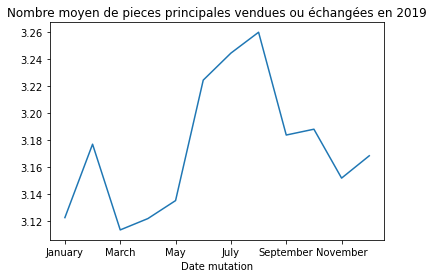

In [ ]:
table_nbpieces_month = full_table_modif.copy()
table_nbpieces_month=table_nbpieces_month.groupby(table_nbpieces_month['Date mutation'].dt.strftime('%B'))['Nombre pieces principales'].mean()
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
table_nbpieces_month = table_nbpieces_month.reindex(annee)
table_nbpieces_month.plot()
plt.title("Nombre moyen de pieces principales vendues ou échangées en 2019")

Les biens composé du plus de nombre de pièces principales sont achetés durant l’été.

# **Importantion du dataset pour 2015**

In [ ]:
full_table15 = pd.read_csv('https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20200416-114842/valeursfoncieres-2015.txt', sep = '|')
print(full_table15)
del full_table15['Code service CH']
del full_table15['Reference document']
del full_table15['1 Articles CGI']
del full_table15['2 Articles CGI']
del full_table15['3 Articles CGI']
del full_table15['4 Articles CGI']
del full_table15['5 Articles CGI']
del full_table15['B/T/Q']
del full_table15['No plan']
del full_table15['No Volume']
del full_table15['Surface Carrez du 1er lot']
del full_table15['1er lot']
del full_table15['2eme lot']
del full_table15['Surface Carrez du 2eme lot']
del full_table15['3eme lot']
del full_table15['Surface Carrez du 3eme lot']
del full_table15['4eme lot']
del full_table15['Surface Carrez du 4eme lot']
del full_table15['5eme lot']
del full_table15['Surface Carrez du 5eme lot']
del full_table15['Code type local']
del full_table15['Type local']
del full_table15['Identifiant local']
del full_table15['Nature culture']
del full_table15['Nature culture speciale']
print(full_table15)
print("Description de la full table :")

         Code service CH  ...  Surface terrain
0                    NaN  ...             82.0
1                    NaN  ...           1550.0
2                    NaN  ...              4.0
3                    NaN  ...            298.0
4                    NaN  ...            195.0
...                  ...  ...              ...
2750300              NaN  ...              NaN
2750301              NaN  ...              NaN
2750302              NaN  ...              NaN
2750303              NaN  ...              NaN
2750304              NaN  ...              NaN

[2750305 rows x 43 columns]
         No disposition  ... Surface terrain
0                     2  ...            82.0
1                     1  ...          1550.0
2                     2  ...             4.0
3                     2  ...           298.0
4                     1  ...           195.0
...                 ...  ...             ...
2750300               1  ...             NaN
2750301               1  ...             NaN
27

# **Cleaning data 2015**

In [ ]:
print(full_table15["Surface reelle bati"].describe())
full_table15_modif=full_table15.copy() 

print("Table Surface relle bati de base :")
print(full_table15_modif["Surface reelle bati"])

count    1.515648e+06
mean     8.476958e+01
std      6.789851e+02
min      0.000000e+00
25%      0.000000e+00
50%      5.800000e+01
75%      9.000000e+01
max      3.730170e+05
Name: Surface reelle bati, dtype: float64
Table Surface relle bati de base :
0           NaN
1           NaN
2           NaN
3           NaN
4           0.0
           ... 
2750300    19.0
2750301    12.0
2750302    30.0
2750303     0.0
2750304    33.0
Name: Surface reelle bati, Length: 2750305, dtype: float64


## Cleaning "Surface reelle bati" pour 2015

In [ ]:
print("Nb de valeurs manquantes dans full table ( valeurs NaN): ")
print(full_table15_modif["Surface reelle bati"].isnull().sum())

print("Longueur de la liste des index où la valeur est 0 : ")
drop_0_init=full_table15_modif.index[full_table15_modif["Surface reelle bati"] == 0.0].tolist()
print(len(drop_0_init))

print("------------------------Modification de la table ------------------------")

print("Remplacement de 0 par NaN :")
full_table15_modif["Surface reelle bati"]=full_table15_modif["Surface reelle bati"].replace({ 0:np.nan})

print("Nouvelles missing values :")
print(full_table15_modif["Surface reelle bati"].isnull().sum())

print("Suppression des valeurs NaN")
full_table15_modif.dropna(axis=0, how='all', subset=['Surface reelle bati'], inplace=True)

print("Nouveau nombre de valeurs manquantes : ")
print(full_table15_modif["Surface reelle bati"].isnull().sum())

print("------------------------Nouvelle table modifiée ------------------------")
print(full_table15_modif)

print("Nouvelle table surface bati modifiée : ")
print(full_table15_modif["Surface reelle bati"])
print("Description de la full table modifiée : ")
print(full_table15_modif["Surface reelle bati"].describe())

print("Index où les valeur sont égales à 0.0 : ")
drop_0=full_table15_modif.index[full_table15_modif["Surface reelle bati"] == 0.0].tolist()
print(drop_0)

Nb de valeurs manquantes dans full table ( valeurs NaN): 
1234657
Longueur de la liste des index où la valeur est 0 : 
400697
------------------------Modification de la table ------------------------
Remplacement de 0 par NaN :
Nouvelles missing values :
1635354
Suppression des valeurs NaN
Nouveau nombre de valeurs manquantes : 
0
------------------------Nouvelle table modifiée ------------------------
         No disposition  ... Surface terrain
5                     1  ...           195.0
6                     1  ...          1580.0
12                    1  ...          1745.0
13                    1  ...          1745.0
20                    2  ...             NaN
...                 ...  ...             ...
2750299               1  ...             NaN
2750300               1  ...             NaN
2750301               1  ...             NaN
2750302               1  ...             NaN
2750304               1  ...             NaN

[1114951 rows x 18 columns]
Nouvelle table surface ba

## Convertir "Valeur foncière" en float pour2015

In [ ]:
full_table15_modif['Valeur fonciere'] =  full_table15_modif['Valeur fonciere'].str.replace(',','.')
full_table15_modif['Valeur fonciere'] = full_table15_modif['Valeur fonciere'].astype(str).astype(float)
#full_table['Valeur fonciere'] = pd.to_numeric(full_table['Valeur fonciere'], errors='coerce')
print(full_table15['Valeur fonciere'])

print(full_table15_modif.dtypes)

0             120,00
1           12400,00
2             110,00
3             180,00
4           95000,00
             ...    
2750300    223000,00
2750301     65000,00
2750302    366000,00
2750303     38000,00
2750304     39000,00
Name: Valeur fonciere, Length: 2750305, dtype: object
No disposition                 int64
Date mutation                 object
Nature mutation               object
Valeur fonciere              float64
No voie                      float64
Type de voie                  object
Code voie                     object
Voie                          object
Code postal                  float64
Commune                       object
Code departement              object
Code commune                   int64
Prefixe de section           float64
Section                       object
Nombre de lots                 int64
Surface reelle bati          float64
Nombre pieces principales    float64
Surface terrain              float64
dtype: object


## Calcul prix du mètre carré pour 2015

In [ ]:
full_table15_modif['Prix_metre2_Bati'] = full_table15_modif['Valeur fonciere'] / (full_table15_modif['Surface reelle bati']+full_table15_modif["Surface terrain"])
print(full_table15_modif['Prix_metre2_Bati'])
print(full_table15_modif["Prix_metre2_Bati"].describe())

print(full_table15_modif['Prix_metre2_Bati'].mean())

5          357.142857
6          127.325581
12         129.918699
13         131.703297
20                NaN
              ...    
2750299           NaN
2750300           NaN
2750301           NaN
2750302           NaN
2750304           NaN
Name: Prix_metre2_Bati, Length: 1114951, dtype: float64
count    6.429330e+05
mean     1.690030e+03
std      2.152161e+04
min      0.000000e+00
25%      1.468354e+02
50%      2.869050e+02
75%      5.705009e+02
max      1.370642e+06
Name: Prix_metre2_Bati, dtype: float64
1690.0302529838157


# **Graphiques de comparaison 2015 et 2019**

## Double courbe prix moyen du mètre carré en fonction du temps pour 2015 et 2019 

Double graph


Text(0.5, 1.0, 'Evolution du prix moyen du m2 en France en 2015 (vert) et en 2019 (rouge)')

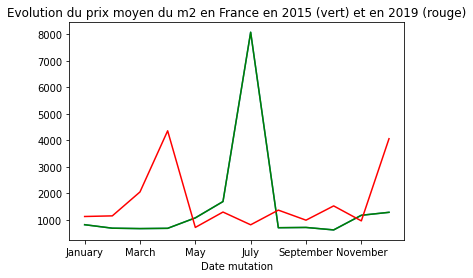

In [ ]:
#Convertir le type des dates de object à dateTime
full_table15_modif['Date mutation'] = pd.to_datetime(full_table15_modif['Date mutation'])
#Trier le tableau par date
full_table15_modif = full_table15_modif.sort_values(by="Date mutation")
#Regrouper les mètres carré de chaque transaction par jour
table15_m2_jours = full_table15_modif.copy()
table15_m2_jours=table15_m2_jours["Prix_metre2_Bati"].groupby(table15_m2_jours['Date mutation'])
#Afficher les moyennes du prix du mètre carré par jour
table15_m2_jours=table15_m2_jours.mean()
#table15_m2_jours.plot()
#plt.show()
#plt.title("Prix moyen du mètre carré au cours de l'année 2015 (distribution par jour)")


#Trié par mois :
table15_m2_month = full_table15_modif.copy()
table15_m2_month=table15_m2_month.groupby(table15_m2_month['Date mutation'].dt.strftime('%B'))['Prix_metre2_Bati'].mean()
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
table15_m2_month = table15_m2_month.reindex(annee)
table15_m2_month.plot()
#print(table_m2_month)
#table15_m2_month.plot()
#plt.show()
#plt.title("Prix moyen du mètre carré au cours de l'année 2015 (distribution par mois) ")

print("Double graph")
table15_m2_month = pd.DataFrame(table15_m2_month)
table_m2_month = pd.DataFrame(table_m2_month)
df_tps = pd.merge(left=table15_m2_month, right=table_m2_month, left_on='Date mutation', right_on='Date mutation')
#print(df_tps)
df_tps['Prix_metre2_Bati_x'].plot(color='g')
df_tps['Prix_metre2_Bati_y'].plot(color='r')
plt.title("Evolution du prix moyen du m2 en France en 2015 (vert) et en 2019 (rouge)")

A l’exception du mois de Juillet où une transaction onéreuse a été effectuée en 2015, le prix moyen du mètre carré en 2015 est significativement inférieur à celui de 2019.


## Double diagramme bâton pour le nombre de ventes par mois

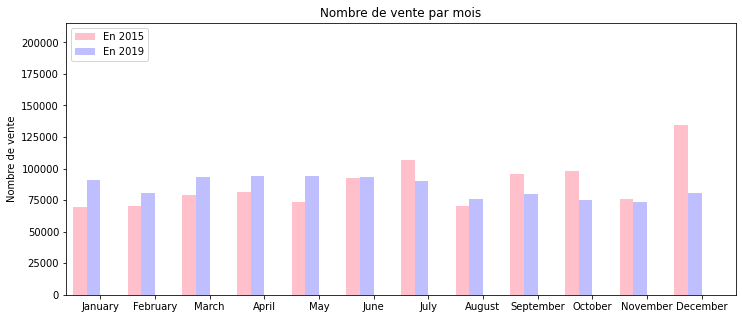

In [ ]:
#Nombre de vente par mois en 2015 et 2019

#Tableau vente en fonction du temps 2019
table_vente_jours=full_table_modif.copy()
table_vente_jours = table_vente_jours[table_vente_jours['Nature mutation']=='Vente'][["Date mutation"]]
table_vente_jours["Nombre de vente"]=1
#print(table_vente_jours)
#Renommer la colonne créée par groupby
d={"Nombre de vente":"Nb de vente"}
table_vente_jours=table_vente_jours.rename(columns=d).groupby(table_vente_jours["Date mutation"].dt.strftime('%B')).sum()
#print(table_vente_jours)
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
table_vente_jours=table_vente_jours.reindex(annee)
#print(table_vente_jours)
#table_vente_jours.plot()
#plt.show()

#	Tableau vente en fonction du temps 2015
table15_vente_jours=full_table15_modif.copy()
table15_vente_jours = table15_vente_jours[table15_vente_jours['Nature mutation']=='Vente'][["Date mutation"]]
table15_vente_jours["Nombre de vente"]=1
#print(table15_vente_jours)
#Renommer la colonne créée par groupby
table15_vente_jours=table15_vente_jours.rename(columns=d).groupby(table15_vente_jours["Date mutation"].dt.strftime('%B')).sum()
#print(table15_vente_jours)
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
table15_vente_jours=table15_vente_jours.reindex(annee)
#print(table15_vente_jours)
#table15_vente_jours.plot()
#plt.show()

# Position des bars
pos = list(range(len(annee)) )
width = 0.25   
fig, ax = plt.subplots(figsize=(12,5))
#Premiere barre
plt.bar(pos, table15_vente_jours['Nb de vente'], width, alpha=1, color='pink') 
#Deuxième barre
plt.bar([p + width for p in pos], table_vente_jours['Nb de vente'],width, alpha=0.25,color='blue')

ax.set_ylabel("Nombre de vente")
ax.set_title('Nombre de vente par mois')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(annee)
# Limites
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(table_vente_jours['Nb de vente'] + table15_vente_jours['Nb de vente'] )] )
# Legendes
plt.legend(['En 2015', 'En 2019'], loc='upper left')
plt.show()

Nous pouvons dire que le nombre de vente par mois au cours de l’année 2015 reste similaire à celui de 2019.

## Comparaison du prix de transaction le plus cher par mois sur l'année

               Prix_metre2_Bati_x  Prix_metre2_Bati_y
Date mutation                                        
January              1.085973e+05        9.951289e+04
February             8.457447e+04        2.931323e+06
March                6.858898e+05        4.844389e+05
April                1.186624e+05        3.300633e+06
May                  1.228855e+05        6.254658e+04
June                 3.854352e+05        3.256372e+05
July                 1.370642e+06        1.468447e+05
August               2.063409e+05        1.112811e+05
September            1.067829e+05        3.449709e+05
October              2.995689e+05        4.214501e+05
November             5.228571e+05        1.060686e+05
December             1.730244e+05        5.835163e+05


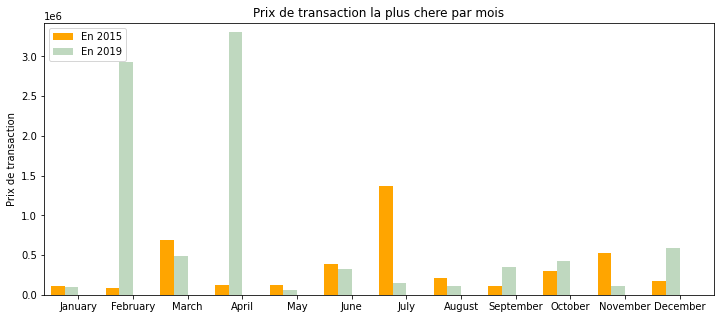

In [ ]:
#Dataframe 2015
prix_max2015 = full_table15_modif.copy()
prix_max2015 = prix_max2015.groupby(prix_max2015['Date mutation'].dt.strftime('%B'))['Prix_metre2_Bati'].max()
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
prix_max2015 = prix_max2015.reindex(annee)

#Dataframe 2019
prix_max2019 = full_table_modif.copy()
prix_max2019 = prix_max2019.groupby(prix_max2019['Date mutation'].dt.strftime('%B'))['Prix_metre2_Bati'].max()
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
prix_max2019 = prix_max2019.reindex(annee)

#Fusion des deux dataframe
prixMax_tps = pd.merge(left=prix_max2015, right=prix_max2019, left_on='Date mutation', right_on='Date mutation')
print(prixMax_tps)

#Double graph baton
# Position des bars
pos = list(range(len(annee)) )
width = 0.25   
fig, ax = plt.subplots(figsize=(12,5))
#Premiere barre
plt.bar(pos, prixMax_tps['Prix_metre2_Bati_x'], width, alpha=1, color='orange') 
#Deuxième barre
plt.bar([p + width for p in pos], prixMax_tps['Prix_metre2_Bati_y'],width, alpha=0.25,color='darkgreen')

ax.set_ylabel("Prix de transaction")
ax.set_title('Prix de transaction la plus chere par mois')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(annee)
# Limites
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(prixMax_tps['Prix_metre2_Bati_x'] + prixMax_tps['Prix_metre2_Bati_y'] )] )
# Legendes
plt.legend(['En 2015', 'En 2019'], loc='upper left')
plt.show()

Nous avions repéré précédemment une transaction onéreuse en Juillet 2015 au niveau du mètre carré, mais ici on voit bien que certaines transactions ont été d’autant plus chère en Février et Avril 2019.

## Comparaison du prix moyen de transaction par mois sur l'année

               Prix_metre2_Bati_x  Prix_metre2_Bati_y
Date mutation                                        
January                810.609060         1120.418608
February               678.682958         1143.907980
March                  663.742220         2047.488574
April                  673.685587         4355.849393
May                   1068.045303          707.859973
June                  1684.866772         1288.323471
July                  8078.139928          806.912833
August                 696.757135         1361.084225
September              706.871842          981.418908
October                613.516612         1520.290489
November              1166.293993          955.144522
December              1278.118365         4057.976109


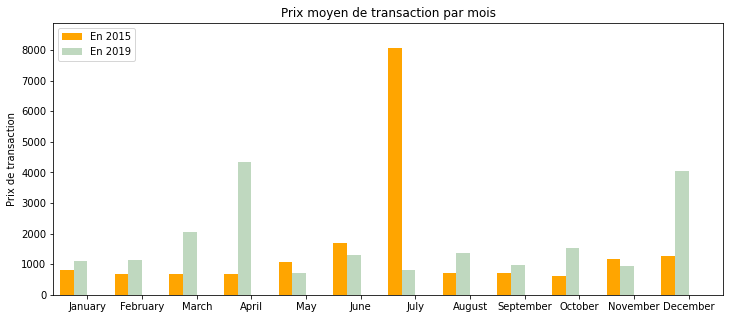

In [ ]:
#Dataframe 2015
prix_mean2015 = full_table15_modif.copy()
prix_mean2015 = prix_mean2015.groupby(prix_mean2015['Date mutation'].dt.strftime('%B'))['Prix_metre2_Bati'].mean()
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
prix_mean2015 = prix_mean2015.reindex(annee)

#Dataframe 2019
prix_mean2019 = full_table_modif.copy()
prix_mean2019 = prix_mean2019.groupby(prix_mean2019['Date mutation'].dt.strftime('%B'))['Prix_metre2_Bati'].mean()
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
prix_mean2019 = prix_mean2019.reindex(annee)

#Fusion des deux dataframe
prixMean_tps = pd.merge(left=prix_mean2015, right=prix_mean2019, left_on='Date mutation', right_on='Date mutation')
print(prixMean_tps)


#Double graph baton
# Position des bars
pos = list(range(len(annee)) )
width = 0.25   
fig, ax = plt.subplots(figsize=(12,5))
#Premiere barre
plt.bar(pos, prixMean_tps['Prix_metre2_Bati_x'], width, alpha=1, color='orange') 
#Deuxième barre
plt.bar([p + width for p in pos], prixMean_tps['Prix_metre2_Bati_y'],width, alpha=0.25,color='darkgreen')

ax.set_ylabel("Prix de transaction")
ax.set_title('Prix moyen de transaction par mois')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(annee)
# Limites
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(prixMean_tps['Prix_metre2_Bati_x'] + prixMean_tps['Prix_metre2_Bati_y'] )] )
# Legendes
plt.legend(['En 2015', 'En 2019'], loc='upper left')
plt.show()

On voit encore une fois la présence d’une transaction onéreuse faite en 2015, mais en dehors de cette donnée, comme pour le prix du mètre carré moyen, le prix de transaction moyen en 2015 est inférieur à celui en 2019. On déduit alors que les deux transaction à prix élevés de Février et Avril 2019 correspondent à des biens de grande surface.

## Comparaison du prix du mètre carré à Paris en 2015 et en 2019 

Text(0.5, 1.0, 'Evolution du prix moyen du m2 en 2015 (vert) et en 2019 (rouge)')

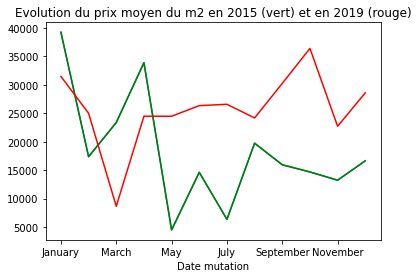

In [ ]:
#Prix du mètre carré à Paris double courbe 2015 
#Regrouper les mètres carré de chaque transaction par mois
table15_paris_m2_month = full_table15_modif.copy()
table15_paris_m2_month=table15_paris_m2_month[table15_paris_m2_month["Code departement"]==75][["Prix_metre2_Bati","Date mutation","Commune","Code departement"]]
table15_paris_m2_month=table15_paris_m2_month.groupby(table15_paris_m2_month['Date mutation'].dt.strftime('%B'))['Prix_metre2_Bati'].mean()
annee=["January","February","March","April","May","June","July","August","September","October","November","December"]
table15_paris_m2_month = table15_paris_m2_month.reindex(annee)
table15_paris_m2_month.plot()
#print(table_m2_month)

#Comparaison avec 2019
#table_paris_m2_month = pd.DataFrame(table_paris_m2_month)
df_tps = pd.merge(left=table15_paris_m2_month, right=table_paris_m2_month, left_on='Date mutation', right_on='Date mutation')
df_tps['Prix_metre2_Bati_x'].plot(color='g')
df_tps['Prix_metre2_Bati_y'].plot(color='r')
plt.title("Evolution du prix moyen du m2 en 2015 (vert) et en 2019 (rouge)")

Que ce soit en 2015 ou en 2019, on observe les même tendances quant au prix moyen du mètre carré à Paris : une baisse courant Février-Mars et une hausse courant Août-Novembre. Cependant, comme observé sur la France de manière générale, le prix moyen du mètre carré a augmenté en 2019, comparé à celui en 2015.